# **TELECOM CHURN PREDICTION**

In this case study, We need to predict whether the particular customer choose another telecom provider.

In telecom terminology ,it is refered as churned or not churned.


## STEP 1 : import and merge data

Our dataset contains three datas named as churn_data , customer_data and internet_data.First of all, we need to import appropriate libraries for our study.


In [1]:
#Import Libraries
#Importing Numpy and Pandas

import numpy as np , pandas as pd

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing datasets
churn_data=pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data=pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


**Merging all datasets to form a master dataset**

In [5]:
#Merging churn_data and customer_data with column "customerID"
merge1=pd.merge(churn_data,customer_data,how="inner",on="customerID")

In [6]:
#Merging merge1 and internet_data to get final master dataset with column "customerID"
telecom=pd.merge(merge1,internet_data,how="inner",on="customerID")

## STEP 2: Inspecting the dataframe

In [7]:
#lets check for duplicate values
telecom[telecom.duplicated()]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [8]:
#lets check head of telecom dataframe
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
#dimension of telecom dataframe
telecom.shape

(7043, 21)

In [10]:
#statistical aspects of telecom dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
#type of each column 
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## STEP 3 : Data cleaning

In [12]:
# checking for null values
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [13]:
telecom["TotalCharges"].value_counts()

#here in "TotalCharges",there are 11 values which is not recorded properly.

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
#lets replace those 11 values with NaN
telecom["TotalCharges"]=telecom["TotalCharges"].replace(" ",np.nan)

In [15]:
#type of TotalCharges was object ,lets change it to numeric
telecom["TotalCharges"]=telecom["TotalCharges"].apply(pd.to_numeric)

In [16]:
telecom.dropna(inplace=True)

In [17]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   object 
 3   Contract          7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7032 non-null   object 
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  MultipleLines     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 


## STEP 4: Data Exploration

In [18]:
#for visualization importing matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

####  1. Demographics

**Demographic analysis** is the study of a population-based on factors such as age, race, and sex.

Lets look into demographic variables gender, SeniorCitizen, Partner and Dependents.

**(a) gender**

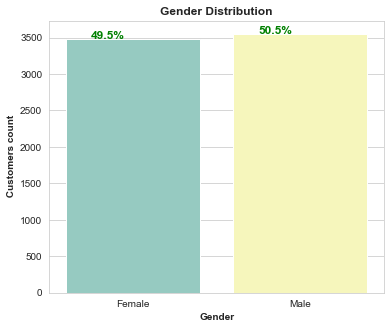

In [19]:
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
ax=sns.countplot(x=telecom["gender"],palette="Set3")
ax.set_ylabel(' Customers count',weight = 'bold')
ax.set_xlabel('Gender',weight = 'bold')

ax.set_title('Gender Distribution',weight = 'bold')


totals=[]
for i in ax.patches:
    totals.append(i.get_height())


total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total)*100, 1))+'%',
            fontsize=12,
            color='green',
           weight = 'bold')

**OBSERVATIONS**

About half of the customers in our dataset is male and other half is female.

It have **49.5%** females and **50.5%** males.

**(b) senior citizen**

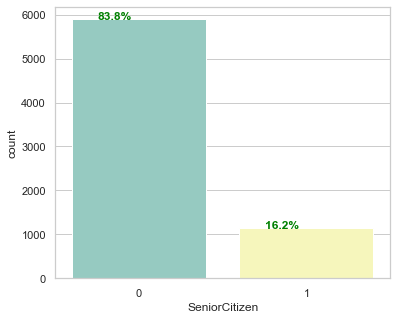

In [20]:
plt.figure(figsize=(6,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x=telecom["SeniorCitizen"],palette="Set3")


totals=[]
for i in ax.patches:
    totals.append(i.get_height())


total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total)*100, 1))+'%',
            fontsize=12,
            color='green',
           weight = 'bold')


**OBSERVATIONS**

There is only **16.2%** of senior citizens present in telecom dataset.


**(c) Partner**

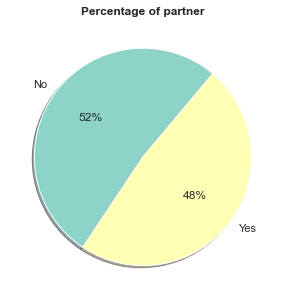

In [21]:
ax = (telecom['Partner'].value_counts()*100.0 /len(telecom))


#define Seaborn color palette to use
colors = sns.color_palette("Set3")

#create pie chart
plt.figure(figsize = (10,5))
plt.title("Percentage of partner",weight="bold")
plt.pie(ax, labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%',startangle=50,shadow=True)
plt.show()


**OBSERVATIONS**

**48%** of customers have partner.

**(d) Dependents** 

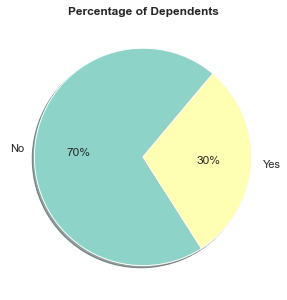

In [22]:
ax=telecom["Dependents"].value_counts()*100/len(telecom)
#create pie chart
plt.figure(figsize = (10,5))
plt.pie(ax, labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%',startangle=50,shadow=True)
plt.title("Percentage of Dependents",weight="bold")
plt.show()

**OBSERVATIONS**

**30%** of customers have dependents.

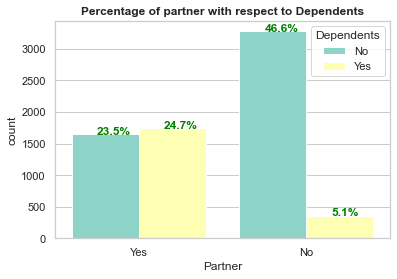

In [23]:
sns.set_theme(style="whitegrid")
#creating countplot with partner column and dependent column
plt.title("Percentage of partner with respect to Dependents",weight="bold")
ax=sns.countplot(x="Partner",hue="Dependents",data=telecom,palette="Set3",saturation=1)

totals=[]
for i in ax.patches:
    totals.append(i.get_height())


total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total)*100, 1))+'%',
            fontsize=12,
            color='green',
           weight = 'bold')
    

**Observations**

percentage of  customers having partners and dependents **24.8%**

percentage of  customers having partners but no dependents **23.5%**

percentage of customers having no partners but have dependents **5.1%**

percentage of customers having no partners and no dependents **46.6%**


#### 2. Customer Information

**(a)Tenure**

**Tenure** means the time for which a customer has been using the service.

Text(0.5, 1.0, '# of Customers by their tenure')

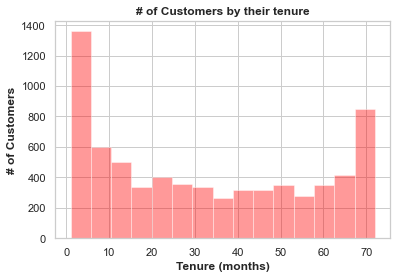

In [24]:
sns.set_theme(style="whitegrid")
ax=sns.distplot(x=telecom["tenure"],hist=True,kde=False,color = "red")
ax.set_ylabel('# of Customers',weight="bold")
ax.set_xlabel('Tenure (months)',weight="bold")
ax.set_title('# of Customers by their tenure',weight="bold")

**Observations**

A lot of customers are there for a month and many other are there for 72 months, this means customers are having different contracts and according to the contract their leaving is varrying.

**(b) Contract**

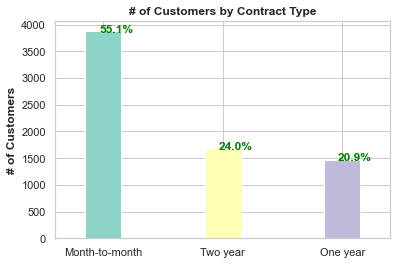

In [25]:
sns.set_theme(style="whitegrid")
colors = sns.color_palette("Set3")
ax = telecom['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3,color=colors)

ax.set_ylabel('# of Customers',weight="bold")
ax.set_title('# of Customers by Contract Type',weight="bold")

for i in ax.patches:
    ax.text(i.get_x()+.115, i.get_height()-21.5, \
            str(round((i.get_height()/total)*100, 1))+'%',
            fontsize=12,
            color='green',
           weight = 'bold')

**Observations**

Most number of customers are in Month-to-Month contract

Text(0.5, 1.0, 'Two year Contract')

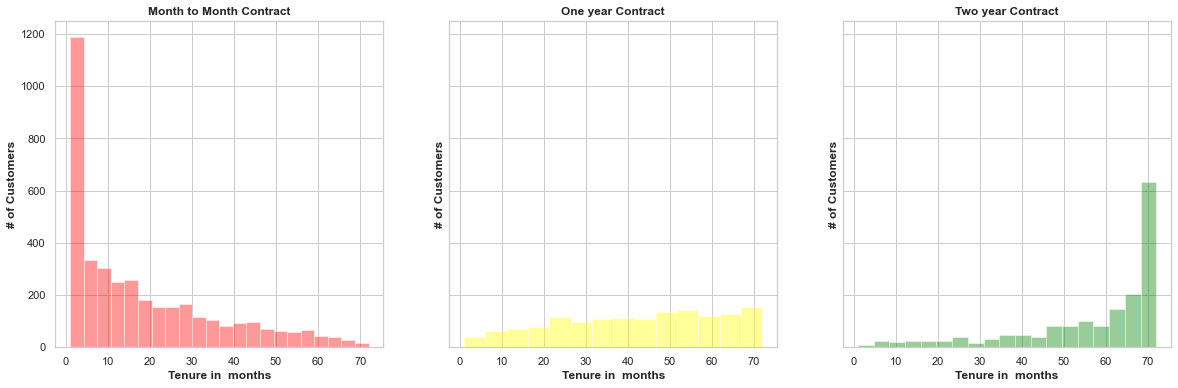

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))
ax=sns.distplot(x=telecom[telecom["Contract"]=="Month-to-month"]["tenure"],hist=True,kde=False,ax=ax1,color="red")
ax.set_ylabel('# of Customers',weight="bold")
ax.set_xlabel('Tenure in  months',weight="bold")
ax.set_title('Month to Month Contract',weight="bold")

ax=sns.distplot(x=telecom[telecom["Contract"]=="One year"]["tenure"],hist=True,kde=False,ax=ax2,color="yellow")
ax.set_ylabel('# of Customers',weight="bold")
ax.set_xlabel('Tenure in  months',weight="bold")
ax.set_title('One year Contract',weight="bold")

ax=sns.distplot(x=telecom[telecom["Contract"]=="Two year"]["tenure"],hist=True,kde=False,ax=ax3,color="green")
ax.set_ylabel('# of Customers',weight="bold")
ax.set_xlabel('Tenure in  months',weight="bold")
ax.set_title('Two year Contract',weight="bold")

**Observations**

most of the monthly contracts wont last 2 months and in other hand two year contracts last for 72 months

**3 . Services used by customers**

In [27]:
#services provided 
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

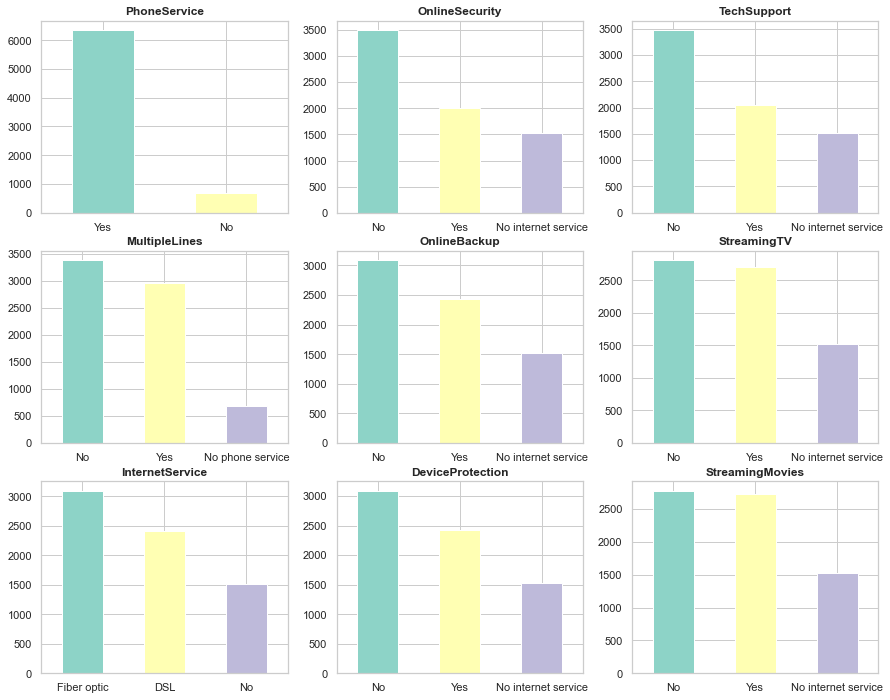

In [28]:
fig,axes=plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
sns.set_theme(style="whitegrid")
colors=sns.color_palette("Set3")
for i,item in enumerate(services):
    if i<3:
        ax=telecom[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0,color=colors)
        
    elif i>=3 and i<6:
        ax=telecom[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0,color=colors)
        
    elif i < 9:
        ax=telecom[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0,color=colors)
    ax.set_title(item,weight="bold")    


**4 . lets look at relation between total charges and monthly charges**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

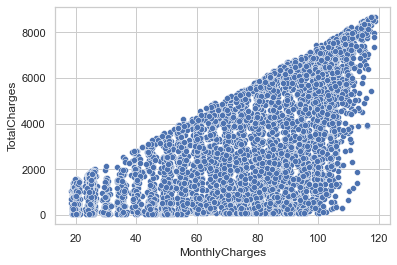

In [29]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=telecom)

**Observations**

Total charges is increasing when monthly charges are increasing

**5. Comparing churn(predictor variable) and other variables**

**CHURN RATE**

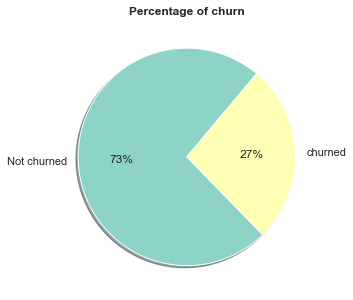

In [30]:
ax=telecom["Churn"].value_counts()*100/len(telecom)
plt.figure(figsize = (10,5))
plt.pie(ax, labels = ['Not churned', 'churned'], colors = colors, autopct='%.0f%%',startangle=50,shadow=True)
plt.title("Percentage of churn",weight="bold")
plt.show()

**Tenure v/s  Churn**

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

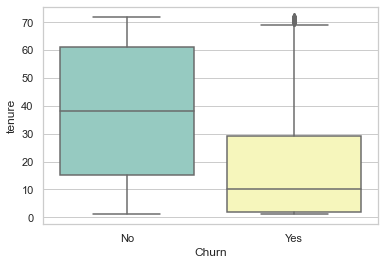

In [31]:
sns.boxplot(x=telecom["Churn"], y=telecom["tenure"],palette="Set3")

**Observations**

from above plot, we can understand that customers who are there for a longer tenure do not churn

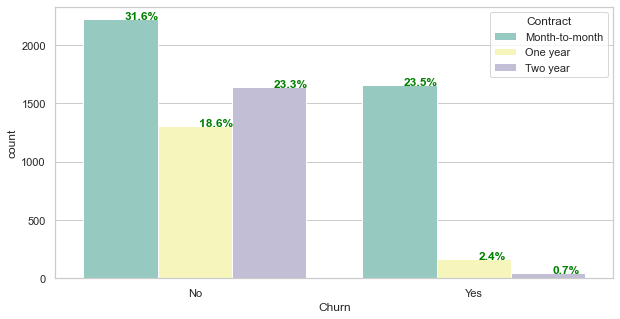

In [32]:
plt.figure(figsize = (10,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x="Churn",hue='Contract',data=telecom,palette="Set3")
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-1.5, \
            str(round((i.get_height()/total)*100, 1))+'%',
            fontsize=12,
            color='green',
           weight = 'bold')

**Observations**

customers having month-to-month contract have higher churn rate

**Churn v/s Senior Citizen**

array([<AxesSubplot:title={'center':'Senior Citizen'}, ylabel='Churn'>],
      dtype=object)

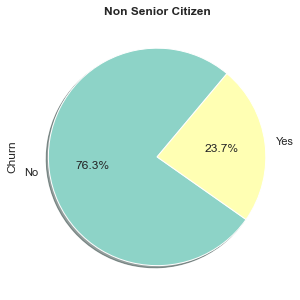

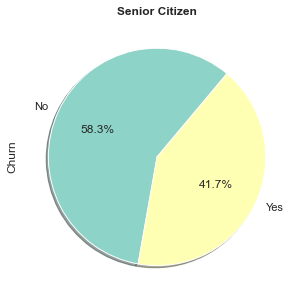

In [33]:
plt.figure(figsize=(15,5))
plt.title('Non Senior Citizen',weight="bold")
pie_seniorcitizen_n=telecom[telecom["SeniorCitizen"]==0]["Churn"].value_counts()
pie_seniorcitizen_n.plot.pie(subplots = True, labels =pie_seniorcitizen_n.index.values, autopct='%1.1f%%', startangle= 50, colors = colors,shadow=True)
plt.gca().set_aspect('equal')

plt.figure(figsize=(15,5))
plt.title('Senior Citizen',weight="bold")
pie_seniorcitizen_y=telecom[telecom["SeniorCitizen"]==1]["Churn"].value_counts()
pie_seniorcitizen_y.plot.pie(subplots = True, labels =pie_seniorcitizen_y.index.values, autopct='%1.1f%%', startangle= 50, colors = colors,shadow=True)

**Observations**

from above piecharts we can understand that senior citizens tends to churn more

**Churn by monthly charges**

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

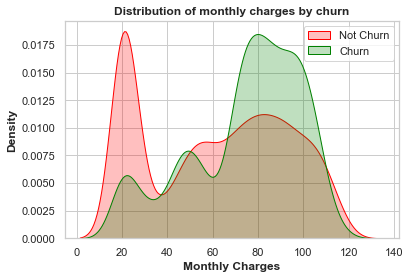

In [34]:
ax=sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"]=='No')],color="red",shade=True)
                
ax=sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"]=='Yes')],ax =ax, color="green", shade= True)
                
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density',weight="bold")
ax.set_xlabel('Monthly Charges',weight="bold")
ax.set_title('Distribution of monthly charges by churn',weight="bold")

**Observations**
when monthly charge increase, churn rate is higher

**Churn by total charges**

Text(0.5, 1.0, 'Distribution of Total charges by churn')

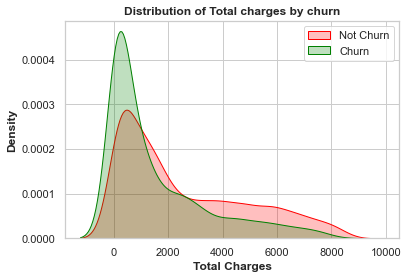

In [35]:
ax=sns.kdeplot(telecom.TotalCharges[(telecom["Churn"]=='No')],color="red",shade=True)
                
ax=sns.kdeplot(telecom.TotalCharges[(telecom["Churn"]=='Yes')],ax =ax, color="green", shade= True)
                
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density',weight="bold")
ax.set_xlabel('Total Charges',weight="bold")
ax.set_title('Distribution of Total charges by churn',weight="bold")

**Observations**

Churn is higher when total charges are lower.

### STEP 4: Data Preparation

In [36]:
# creating a list with column names in telecom having binary values
binary_list=["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]

In [37]:
#function to change Yes/no to 0,1
def binary_map(x):
    return x.map({"Yes":1,"No":0})

In [38]:
telecom[binary_list]=telecom[binary_list].apply(binary_map)

**Dummy variable creation**

In [39]:
telecom.select_dtypes(include=object).columns

Index(['customerID', 'Contract', 'PaymentMethod', 'gender', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [40]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [41]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [42]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [43]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [44]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [45]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric.

**checking for outliers**

In [46]:
telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.162400,0.482509,0.298493,0.209329,...,0.438993,0.344852,0.439989,0.343857,0.493743,0.290102,0.399460,0.384386,0.395478,0.388367
std,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.368844,0.499729,0.457629,0.406858,...,0.496300,0.475354,0.496421,0.475028,0.499996,0.453842,0.489822,0.486484,0.488988,0.487414
min,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,69.000000,1.000000,1.000000,102.645000,5976.640000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,72.000000,1.000000,1.000000,107.422500,6923.590000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,72.000000,1.000000,1.000000,114.734500,8039.883000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


from above,its clear that there is no outliers.

In [47]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

###  Step 5: Model creation and prediction

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Putting feature variable to X
X=telecom.drop(["Churn","customerID"],axis=1)
# Putting target variable to y
y=telecom["Churn"]

In [50]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [51]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4922, 30)
(4922,)
(2110, 30)
(2110,)


**Feature Scaling**

In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [55]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


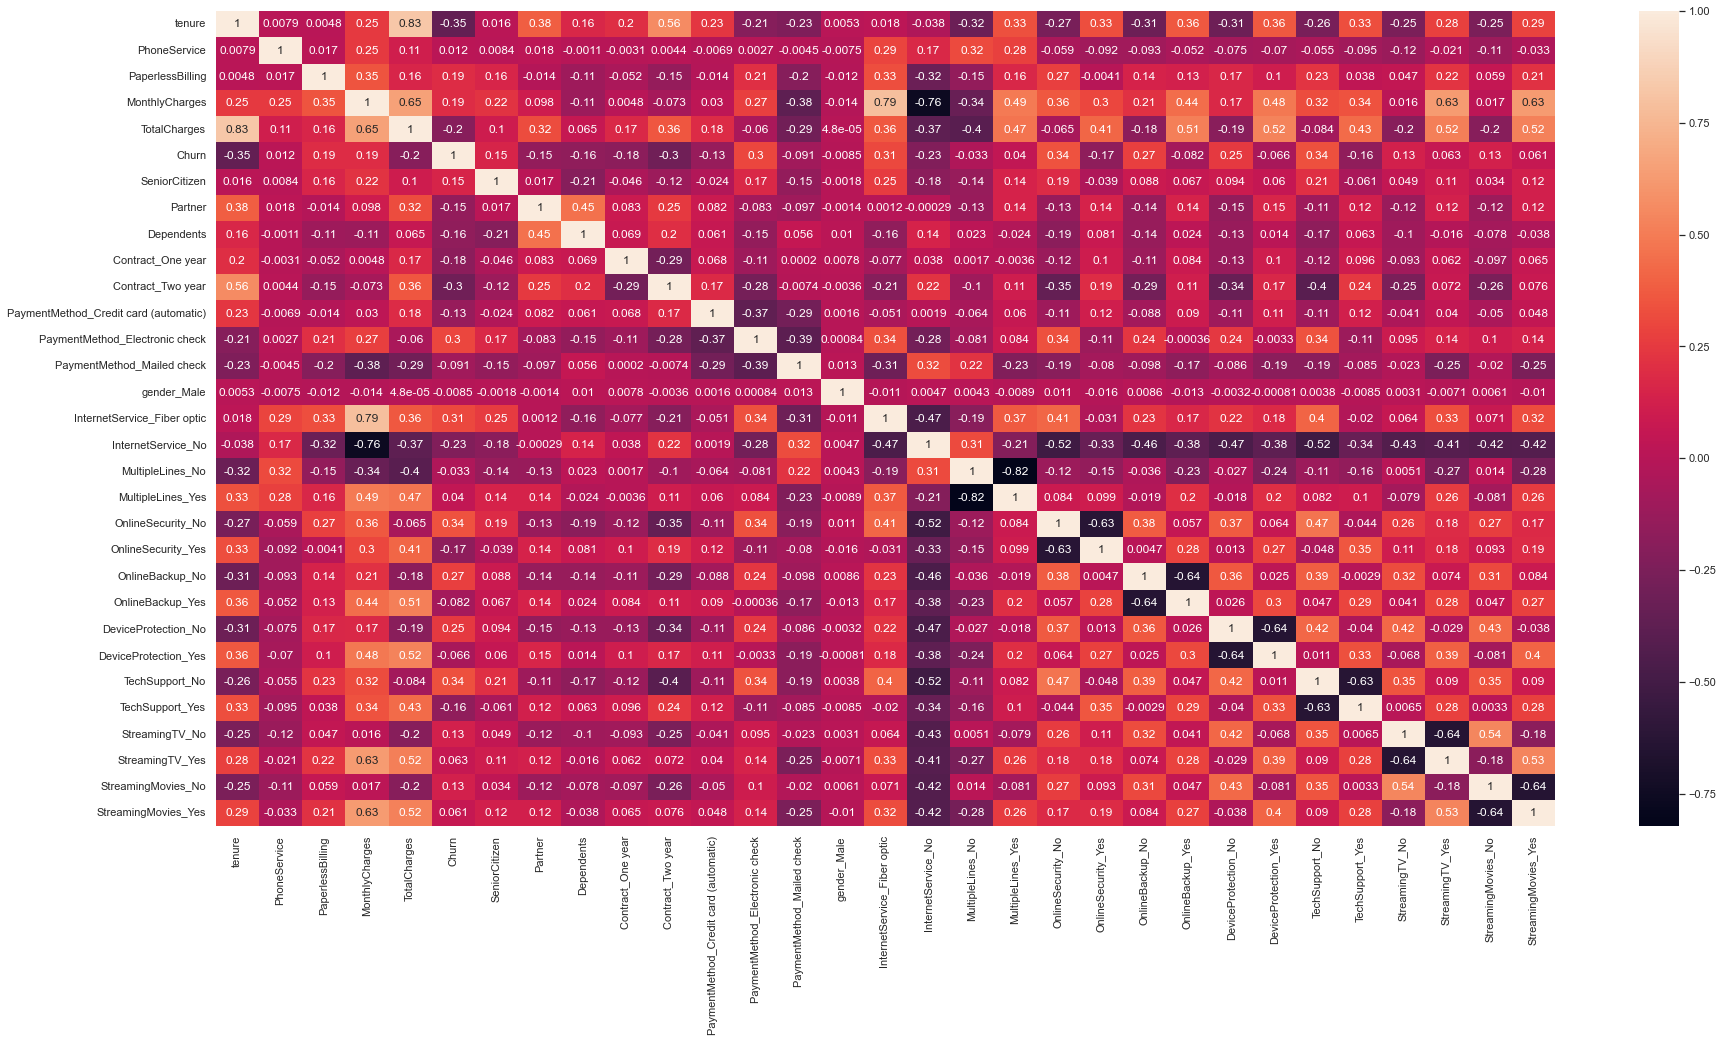

In [56]:
#corelation matrix
plt.figure(figsize = (30,15))        
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [57]:
#dropping highly corelated variables
X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'],axis=1,inplace=True)

X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'],axis=1,inplace=True)

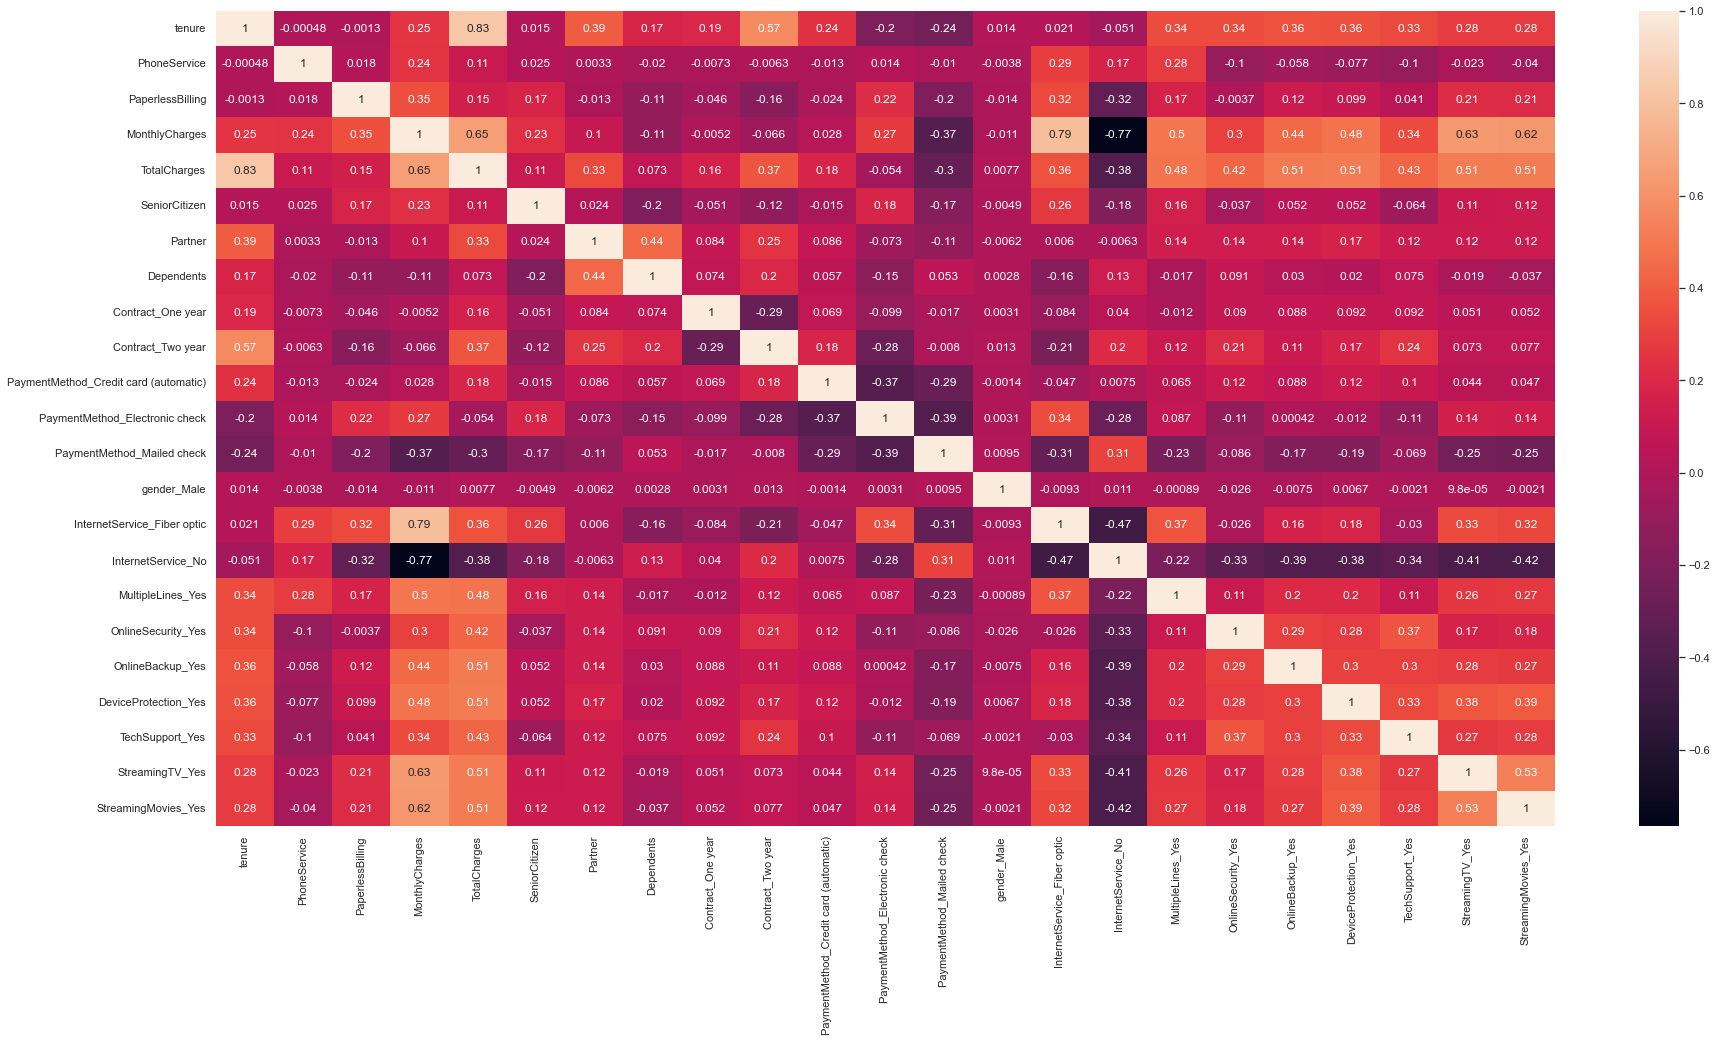

In [58]:
plt.figure(figsize = (30,15))        
sns.heatmap(X_train.corr(),annot = True)
plt.show()

**feature selection using RFE**

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=15)

rfe=rfe.fit(X_train,y_train)

In [61]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [63]:
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [65]:
len(X_train.columns[rfe.support_])

15

In [66]:
import statsmodels.api as sm

In [67]:
X_train_sm=sm.add_constant(X_train[rfe_col])
lr1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model1=lr1.fit()

In [68]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sun, 21 Nov 2021   Deviance:                       4022.2
Time:                        11:41:16   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [69]:
# Getting the predicted values on the train set
y_train_pred = model1.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [70]:
y_train_pred.head()

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

##### Creating a dataframe with the actual churn  and the predicted probabilities

In [72]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.192642
1,0,0.275624
2,1,0.599507
3,1,0.513571
4,1,0.648233


In [73]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.192642,0
1,0,0.275624,0
2,1,0.599507,1
3,1,0.513571,1
4,1,0.648233,1


In [74]:
from sklearn import metrics

In [75]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"] )
print(confusion)

[[3275  360]
 [ 574  713]]


In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"]))

0.8102397399431126


#### Checking VIFs (Variance inflation factor)

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


there are columns having high VIF.PhoneService have high VIF.so we need to drop columns having high VIF.

In [79]:
rfe_col=rfe_col.drop('MonthlyCharges', 1)


In [80]:
rfe_col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [81]:
# Let's re-run the model using the selected variables
X_train_sm=sm.add_constant(X_train[rfe_col])
lr2= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model2=lr2.fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Sun, 21 Nov 2021   Deviance:                       4046.2
Time:                        11:41:18   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [82]:
y_train_pred=model2.predict(X_train_sm).values.reshape(-1)

In [83]:
y_train_pred[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [84]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [85]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.227902,0
1,0,0.228644,0
2,1,0.674892,1
3,1,0.615868,1
4,1,0.662260,1


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"]))

0.8057700121901666


##### Let's check the VIFs again

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [88]:
rfe_col=rfe_col.drop('TotalCharges', 1)


In [89]:
# Let's re-run the model using the selected variables
X_train_sm=sm.add_constant(X_train[rfe_col])
lr3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model3=lr3.fit()
print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sun, 21 Nov 2021   Deviance:                       4051.9
Time:                        11:41:19   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [90]:
y_train_pred=model3.predict(X_train_sm).values.reshape(-1)

In [91]:
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [92]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [93]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.245817,0
1,0,0.265361,0
2,1,0.669410,1
3,1,0.630970,1
4,1,0.682916,1


In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"]))

0.8061763510767981


##### Let's now check the VIFs again

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


now all variables having low vif so no need to drop anymore


In [96]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

In [97]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.8061763510767981

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# True Positive Rate = True Positives / (True Positives + False Negatives)
# Let's see the sensitivity of our logistic regression model; sensitivity = True Positive Rate
TP / float(TP+FN)


0.5361305361305362

In [100]:
# False Positive Rate = False Positives / (False Positives + True Negatives)
# Specificity = True Negatives / (True Negatives + False Positives)
TN / float(TN+FP)

0.9017881705639614

In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.6590257879656161


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8459354838709677


#### ploting the ROC Curve

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
 
    return None

In [104]:
metrics.roc_auc_score(y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"])

0.847819855522744

In [105]:
y_train_pred_final

,Churn,Churn_Prob,predicted
0,0,0.245817,0
1,0,0.265361,0
2,1,0.669410,1
3,1,0.630970,1
4,1,0.682916,1
...,...,...,...
4917,0,0.024976,0
4918,0,0.095470,0
4919,0,0.063184,0
4920,0,0.100672,0


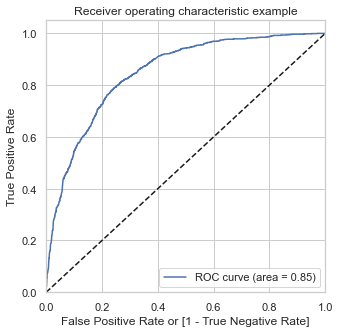

In [106]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

####  finding optimal cuttoff

In [107]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,1,1,1,1,1,1,1,1,0,0,0


In [108]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy',"sensitivity","specificity"])
cutoff_df

,prob,accuracy,sensitivity,specificity


In [110]:
number = [float(x)/10 for x in range(10)]
for i in number:
    cm=metrics.confusion_matrix(y_train_pred_final["Churn"],y_train_pred_final[i])
    TP=cm[1,1]
    TN=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    sensitivity=TP/float(TP+FN)
    specificity=TN/float(TN+FP)
    cutoff_df.loc[i]=[i,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.261479     1.000000     0.000000
0.1   0.1  0.614994     0.943279     0.498762
0.2   0.2  0.721861     0.846154     0.677854
0.3   0.3  0.770012     0.776224     0.767813
0.4   0.4  0.790532     0.636364     0.845117
0.5   0.5  0.806176     0.536131     0.901788
0.6   0.6  0.798050     0.380730     0.945805
0.7   0.7  0.776310     0.196581     0.981568
0.8   0.8  0.747867     0.041181     0.998074
0.9   0.9  0.738521     0.000000     1.000000


<AxesSubplot:xlabel='prob'>

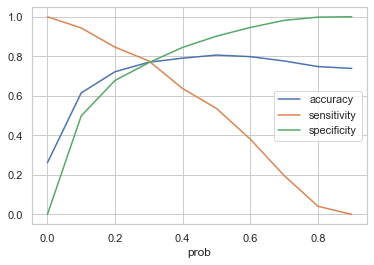

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x="prob",y=["accuracy","sensitivity","specificity"])

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.245817,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.265361,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.669410,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.630970,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.682916,1,1,1,1,1,1,1,1,0,0,0,1


In [113]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7700121901665989

In [114]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.7678129298486933

In [118]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23218707015130674


In [119]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5420510037981552


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064631373822669


In [121]:
#transforming the columns in X_test 

X_test[["tenure","MonthlyCharges","TotalCharges"]]=scaler.fit_transform(X_test[["tenure","MonthlyCharges","TotalCharges"]])

X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.332755,1,1,0.501209,-0.115603,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3730,1.006613,1,1,1.319754,1.616282,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,1
1761,1.047200,1,1,-1.338442,-0.330920,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
2283,-1.266254,1,1,0.225593,-0.967971,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1872,0.357223,1,0,-1.496174,-0.644288,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [122]:
X_test=X_test[rfe_col]
X_test

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.332755,1,0,0,0,1,0,1,0,0,0,0,1
3730,1.006613,1,0,0,0,1,0,1,0,1,0,1,1
1761,1.047200,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.266254,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.357223,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1.250135,0,0,1,0,0,0,0,0,1,1,0,0
3508,1.534243,1,0,0,1,0,0,1,0,1,1,1,1
6765,1.493656,1,0,0,1,0,0,0,1,1,0,0,0
3598,-1.266254,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
X_test_sm = sm.add_constant(X_test)

In [124]:
y_test_pred = model3.predict(X_test_sm)

In [125]:
y_test_pred 

942     0.416316
3730    0.258890
1761    0.008592
2283    0.588052
1872    0.013846
          ...   
1289    0.022913
3508    0.053906
6765    0.008311
3598    0.498891
4987    0.005465
Length: 2110, dtype: float64

In [126]:
final=pd.DataFrame(y_test_pred )
final.shape

(2110, 1)

In [127]:
final["Churn"]=y_test

In [128]:
final=final.rename(columns={0:"Churn_probab"})

In [129]:
final["final_test_pred"]=final["Churn_probab"].map(lambda x: 1 if x>.50 else 0)
final

,Churn_probab,Churn,final_test_pred
942,0.416316,0,0
3730,0.258890,1,0
1761,0.008592,0,0
2283,0.588052,1,1
1872,0.013846,0,0
...,...,...,...
1289,0.022913,0,0
3508,0.053906,0,0
6765,0.008311,0,0
3598,0.498891,0,0


In [130]:
metrics.accuracy_score(final["Churn"],final["final_test_pred"])

0.7895734597156399

In [131]:
confusion_test=metrics.confusion_matrix(final["Churn"],final["final_test_pred"])

In [132]:
confusion_test

array([[1363,  165],
       [ 279,  303]], dtype=int64)

In [133]:
TP = confusion_test[1,1] 
TN = confusion_test[0,0] 
FP = confusion_test[0,1] 
FN = confusion_test[1,0]

In [134]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [135]:
print("accuracy = ",accuracy)
print("\n")
print("sensitivity =",sensitivity)
print("\n")
print("specificity =",specificity)

accuracy =  0.7895734597156399


sensitivity = 0.520618556701031


specificity = 0.8920157068062827
